##Import libraries

In [ ]:
#import data
import pandas as pd
#SVD factorization
import numpy as np
#visulizing
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
#avaluation metrics
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, mean_absolute_error, recall_score
#preprocessing
from sklearn.preprocessing import FunctionTransformer, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
#mlp
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from keras.models import Sequential


## Read the dataset from the file

Read the dataset with semicolon seperated CSV file.

In [ ]:
df_original = pd.read_csv('/content/bank-full.csv', sep =";")

In [ ]:
df_original.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


Check if there are missing values (null) and confirm that there are no missing values present in any column.

In [ ]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


## Identify the numerical columns and their distributions.

In [ ]:
numerical_df = df_original.select_dtypes(include=np.number)
numerical_df.info()

numerical_df = numerical_df.drop(['duration'], axis=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   age       45211 non-null  int64
 1   balance   45211 non-null  int64
 2   day       45211 non-null  int64
 3   duration  45211 non-null  int64
 4   campaign  45211 non-null  int64
 5   pdays     45211 non-null  int64
 6   previous  45211 non-null  int64
dtypes: int64(7)
memory usage: 2.4 MB


In [ ]:
numerical_df.describe()

,age,balance,day,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,63.000000,871.000000,275.000000


## Preprocess the numerical columns

draw boxplot, histogram and Q-Q plot to identify skewness and outlier if any.

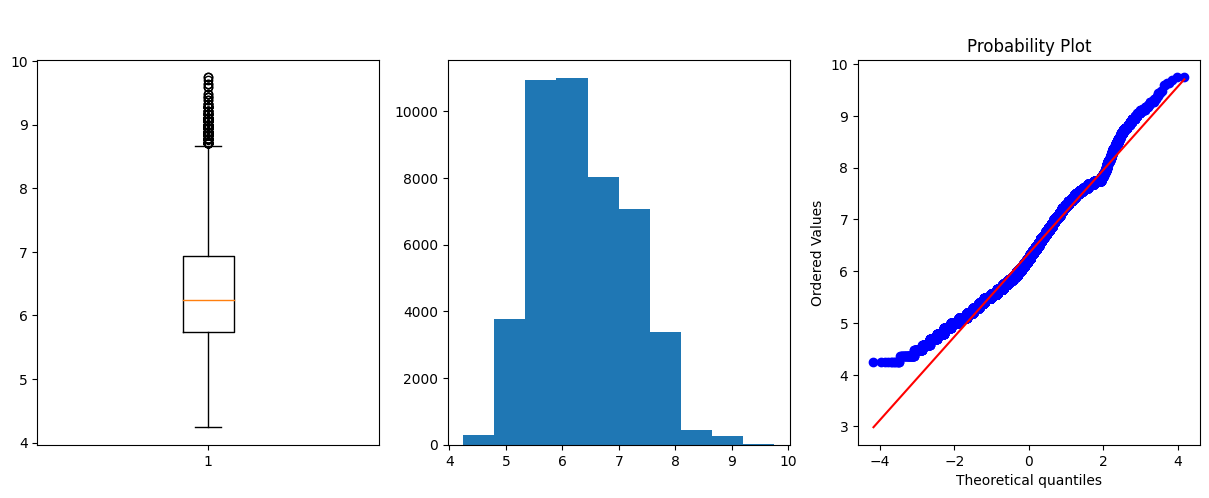

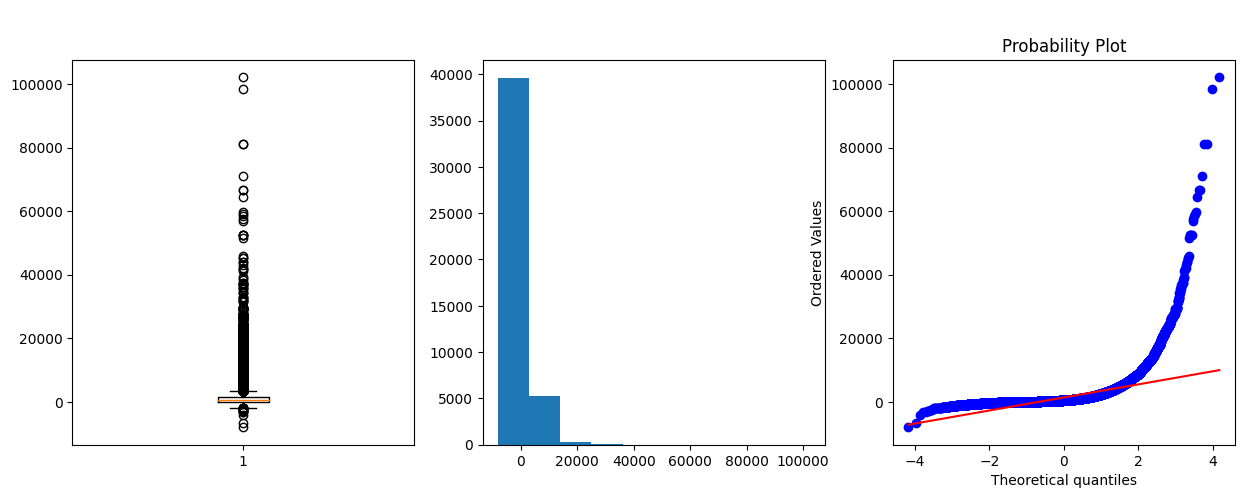

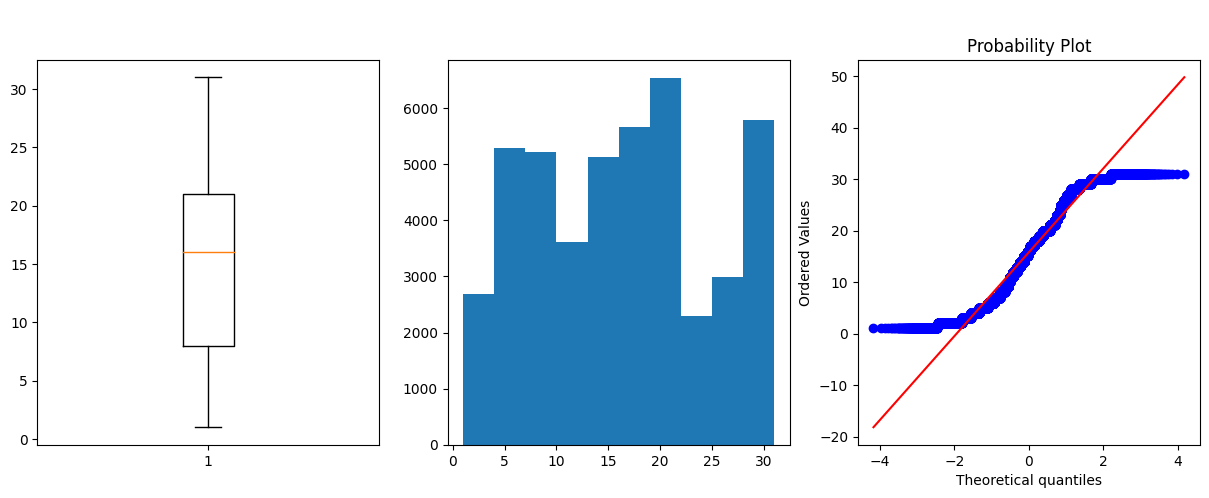

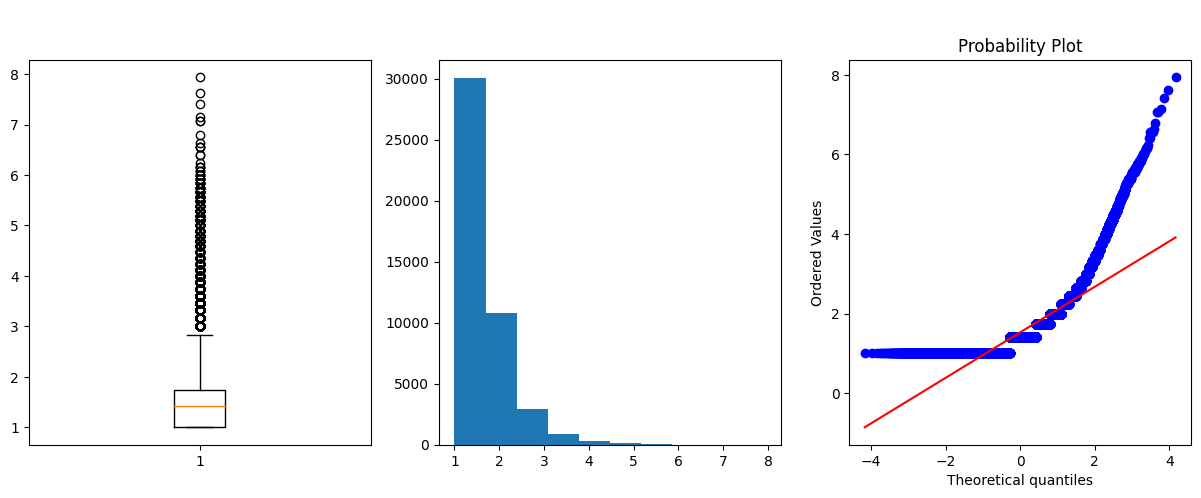

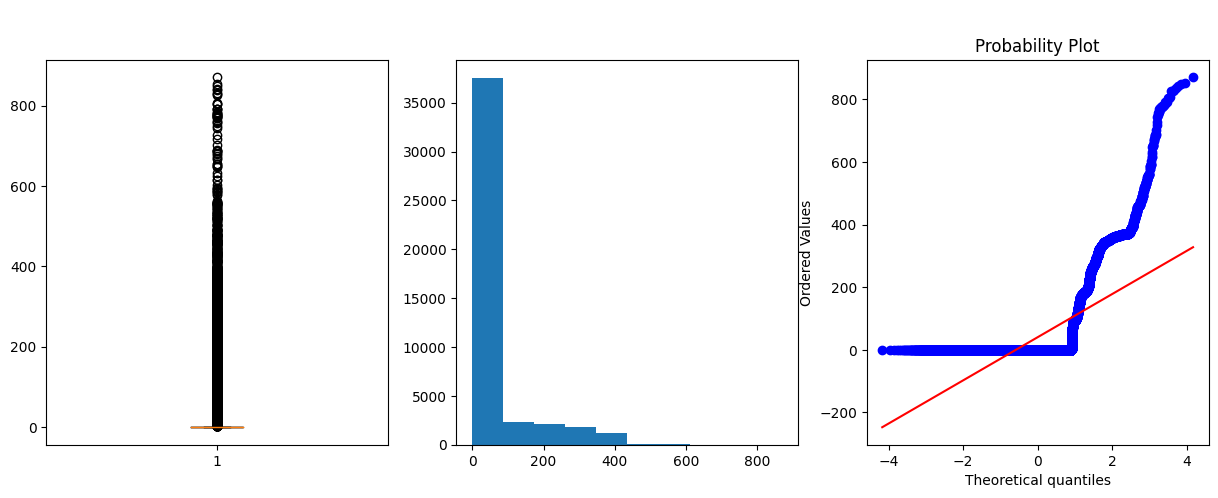

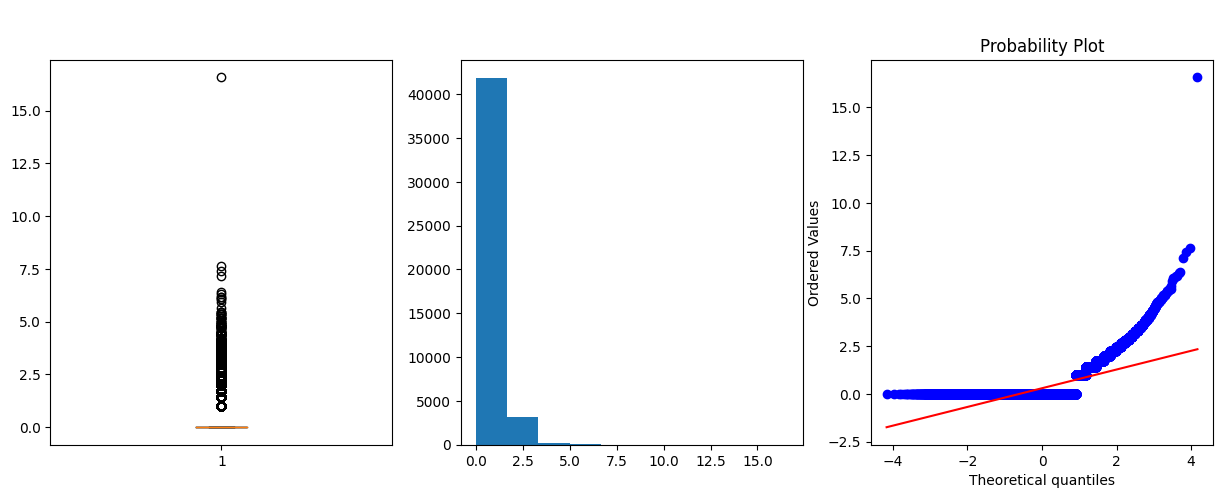

In [ ]:
cols = numerical_df.columns

for col in cols:
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,5))
    fig.suptitle(col.capitalize(), fontsize=20, color='White')
    axes[0].boxplot(numerical_df[col])
    axes[1].hist(numerical_df[col])
    stats.probplot(numerical_df[col], dist="norm", plot=axes[2])
    plt.show()

We can see Age, Duration (min=0), Campaign, previous (min=0) are right skewed.

We will use sqrt to do the transformations.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but FunctionTransformer was fitted without feature names
  warnings.warn(


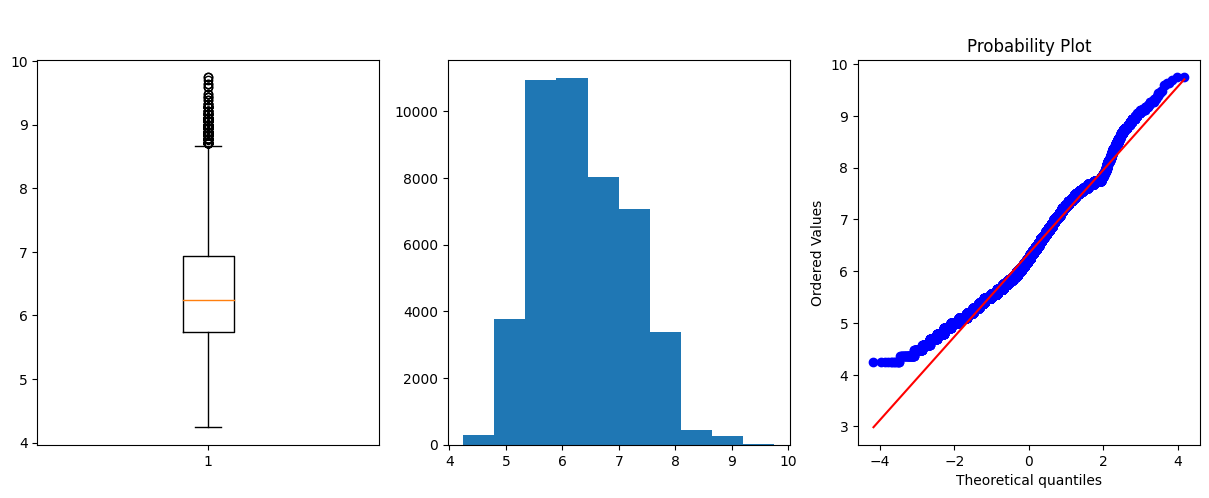

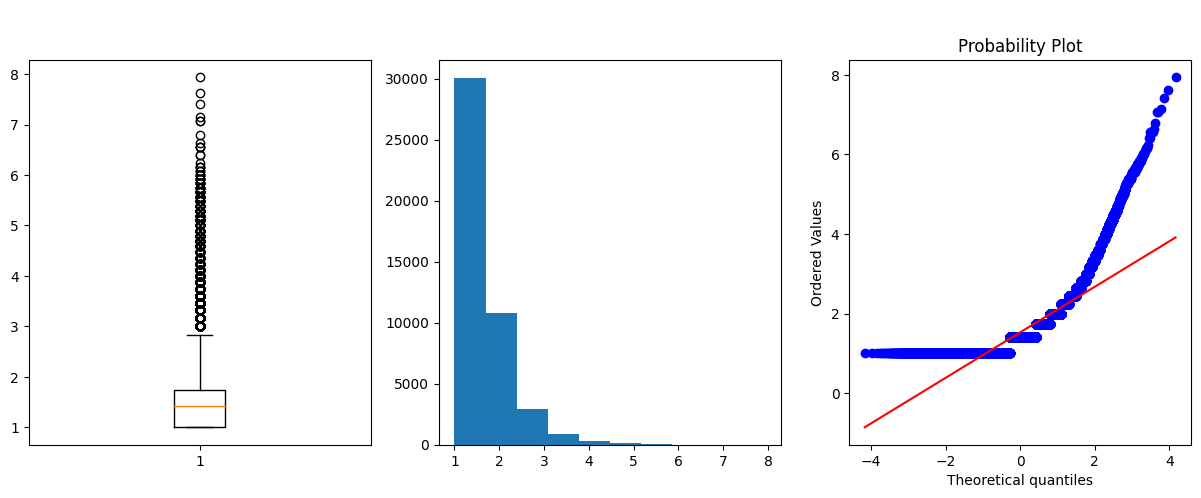

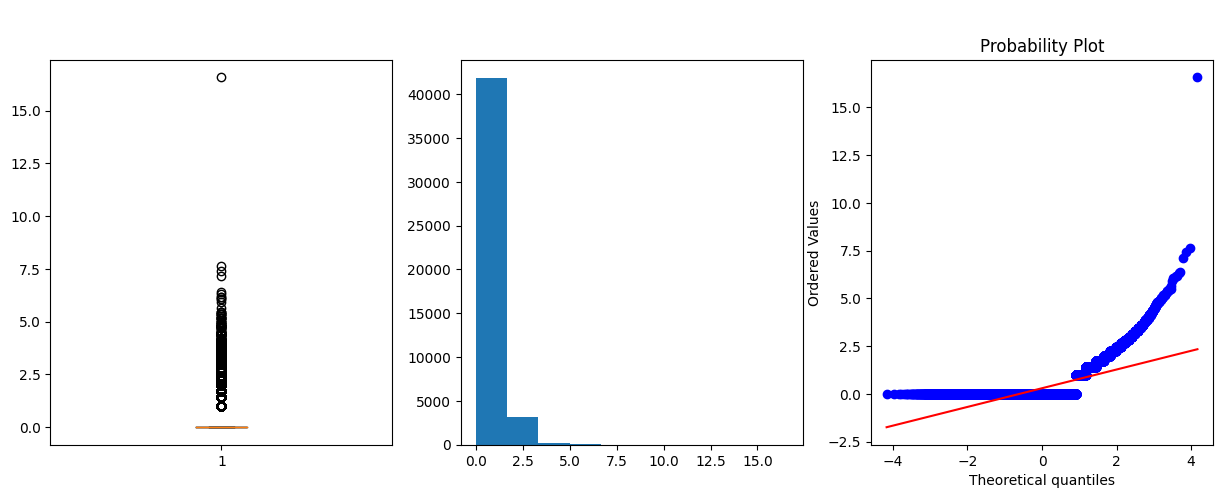

In [ ]:
sqrt_transformer = FunctionTransformer(np.sqrt, validate=True)

to_sqrt = ['age', 'campaign', 'previous']
data_new = sqrt_transformer.transform(numerical_df[to_sqrt])
for index, col in enumerate(to_sqrt):
    numerical_df[col] = data_new[:,index]
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,5))
    fig.suptitle(col.capitalize(), fontsize=20, color='White')
    axes[0].boxplot(numerical_df[col])
    axes[1].hist(numerical_df[col])
    stats.probplot(numerical_df[col], dist="norm", plot=axes[2])
    plt.show()

## Identify the categorical columns.

In [ ]:
cat_df = df_original.select_dtypes(exclude=np.number)
cat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   job        45211 non-null  object
 1   marital    45211 non-null  object
 2   education  45211 non-null  object
 3   default    45211 non-null  object
 4   housing    45211 non-null  object
 5   loan       45211 non-null  object
 6   contact    45211 non-null  object
 7   month      45211 non-null  object
 8   poutcome   45211 non-null  object
 9   y          45211 non-null  object
dtypes: object(10)
memory usage: 3.4+ MB


## Preprocess categorical features

Code using one hot encoder

In [ ]:
cat_columns = cat_df.columns
cat_columns = cat_columns.drop('y')
onehot_encoder = OneHotEncoder(handle_unknown='ignore')
onehot_encoder.fit(cat_df[cat_columns])
coded_column_names = onehot_encoder.get_feature_names_out(cat_columns)

onehot_encoder_df = pd.DataFrame(onehot_encoder.transform(cat_df[cat_columns]).toarray(),columns=coded_column_names)
cat_df = cat_df.join(onehot_encoder_df)
cat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 54 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   job                  45211 non-null  object 
 1   marital              45211 non-null  object 
 2   education            45211 non-null  object 
 3   default              45211 non-null  object 
 4   housing              45211 non-null  object 
 5   loan                 45211 non-null  object 
 6   contact              45211 non-null  object 
 7   month                45211 non-null  object 
 8   poutcome             45211 non-null  object 
 9   y                    45211 non-null  object 
 10  job_admin.           45211 non-null  float64
 11  job_blue-collar      45211 non-null  float64
 12  job_entrepreneur     45211 non-null  float64
 13  job_housemaid        45211 non-null  float64
 14  job_management       45211 non-null  float64
 15  job_retired          45211 non-null 

In [ ]:
cat_df.drop(cat_columns, axis=1, inplace=True)
cat_df.head(20)

,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,no,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,no,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,no,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,no,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,no,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,no,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6,no,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7,no,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8,no,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9,no,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## Merge the two dfs

In [ ]:
final_df = cat_df.join(numerical_df)
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 51 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   y                    45211 non-null  object 
 1   job_admin.           45211 non-null  float64
 2   job_blue-collar      45211 non-null  float64
 3   job_entrepreneur     45211 non-null  float64
 4   job_housemaid        45211 non-null  float64
 5   job_management       45211 non-null  float64
 6   job_retired          45211 non-null  float64
 7   job_self-employed    45211 non-null  float64
 8   job_services         45211 non-null  float64
 9   job_student          45211 non-null  float64
 10  job_technician       45211 non-null  float64
 11  job_unemployed       45211 non-null  float64
 12  job_unknown          45211 non-null  float64
 13  marital_divorced     45211 non-null  float64
 14  marital_married      45211 non-null  float64
 15  marital_single       45211 non-null 

##spliting X,y and train,test

In [ ]:
df_features = final_df.drop('y',axis=1)
df_target = pd.DataFrame(final_df['y'], columns=["y"])
df_target['y'] = df_target['y'].astype('category').cat.codes

Split train,validation and test and Scaling them

In [ ]:
# split data into train and test
X_train, X_test, y_train, y_test = train_test_split(df_features, df_target, test_size=0.3, random_state=101)
# split test into validation and test
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=101)
# scale data using standard scaler on train and apply to test and validation
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

##Create classification report

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# create classification report for model evaluation
def create_report(y_test, y_pred):
    print(classification_report(y_test, y_pred))
    # plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
def model_plot(mlp_model):
  losses = pd.DataFrame(mlp_model.history.history)
  losses[['loss', 'val_loss']].plot()
  losses[['accuracy', 'val_accuracy']].plot()
  plt.show()

##Create Low rank factorization function

In [ ]:
def low_rank_approximation(A, k):
    # Compute SVD of A
    U, s, Vt = np.linalg.svd(A, full_matrices=False)

    # Truncate SVD matrices to rank k
    Uk = U[:, :k]
    sk = np.diag(s[:k])
    Vtk = Vt[:k, :]

    # Compute low rank approximation of A
    A_approx = np.dot(Uk, np.dot(sk, Vtk))

    return A_approx

##Create update weight function

In [ ]:
def update_weight(mlp_model, k):
  weights = mlp_model.get_weights()
  weights[0] = low_rank_approximation(weights[0], k) #Since we only have 1 hidden and cant factorize last 1D weights
  mlp_model.set_weights(weights)


#MLP model 1

## Fit the MLP with 1 hidden layers with 10 neurons

In [ ]:
#create model with 10 neurons
mlp_1 = Sequential()
mlp_1.add(Dense(10, activation='relu', input_dim=X_train.shape[1]))
mlp_1.add(Dense(1, activation='sigmoid'))
mlp_1.compile(optimizer=Adam(lr=0.01), loss='binary_crossentropy', metrics=['accuracy'])
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)
mlp_1.fit(x=X_train, y=y_train, epochs=20, validation_data=(X_val, y_val), callbacks=[early_stop])

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


989/989 [==============================] - 2s 2ms/step - loss: 0.3127 - accuracy: 0.8885 - val_loss: 0.3202 - val_accuracy: 0.8841
Epoch 2/20
989/989 [==============================] - 2s 2ms/step - loss: 0.2976 - accuracy: 0.8923 - val_loss: 0.3116 - val_accuracy: 0.8853
Epoch 3/20
989/989 [==============================] - 2s 2ms/step - loss: 0.2951 - accuracy: 0.8934 - val_loss: 0.3104 - val_accuracy: 0.8853
Epoch 4/20
989/989 [==============================] - 2s 2ms/step - loss: 0.2933 - accuracy: 0.8941 - val_loss: 0.3113 - val_accuracy: 0.8820
Epoch 5/20
989/989 [==============================] - 2s 2ms/step - loss: 0.2920 - accuracy: 0.8930 - val_loss: 0.3158 - val_accuracy: 0.8826
Epoch 6/20
989/989 [==============================] - 2s 2ms/step - loss: 0.2917 - accuracy: 0.8938 - val_loss: 0.3100 - val_accuracy: 0.8838
Epoch 7/20
989/989 [==============================] - 2s 2ms/step - loss: 0.2910 - accuracy: 0.8944 - val_loss: 0.3128 - val_accuracy: 0.8834
Epoch 8/20
989/98

###accuracy and loss

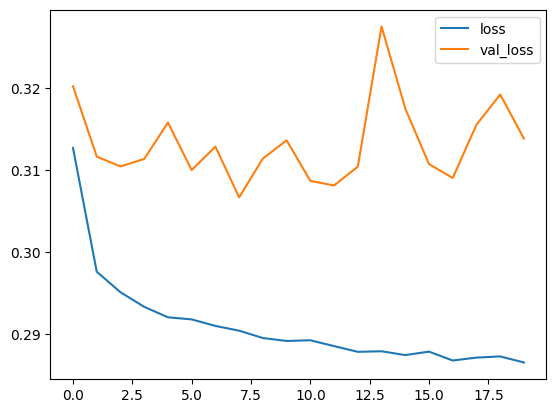

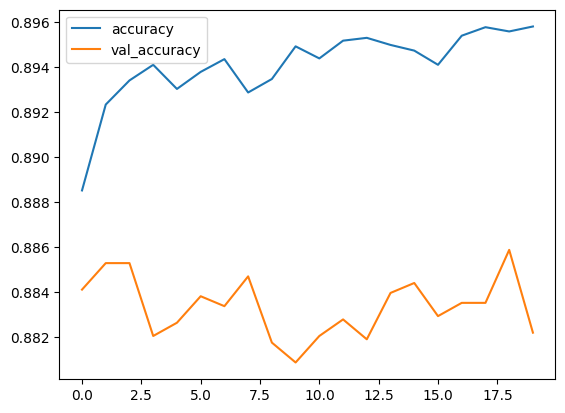

In [ ]:
model_plot(mlp_1)

### Draw the confusion matrix for evaluation

212/212 [==============================] - 0s 864us/step
              precision    recall  f1-score   support

           0       0.93      0.94      0.94      6036
           1       0.48      0.44      0.46       746

    accuracy                           0.89      6782
   macro avg       0.71      0.69      0.70      6782
weighted avg       0.88      0.89      0.88      6782



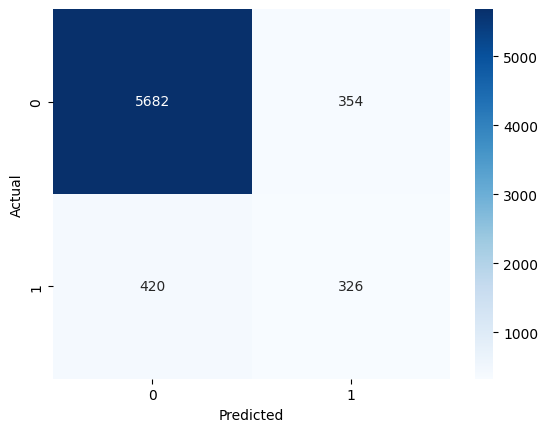

In [ ]:
# create report
create_report(y_test, mlp_1.predict(X_test)>0.3)

#MLP model 1 with LMF


## perform low rank matrix on weight matrix after train


In [ ]:
conf_matrices_model1 = []
real_weights = mlp_1.get_weights()
for k in range(1,11):
  mlp_1.set_weights(real_weights)
  update_weight(mlp_1, k)
  predictions = mlp_1.predict(X_test)>0.3
  cnf_matrix = confusion_matrix(y_test, predictions)
  conf_matrices_model1.append(cnf_matrix)

212/212 [==============================] - 0s 921us/step


### Draw the confusion matrix for each k

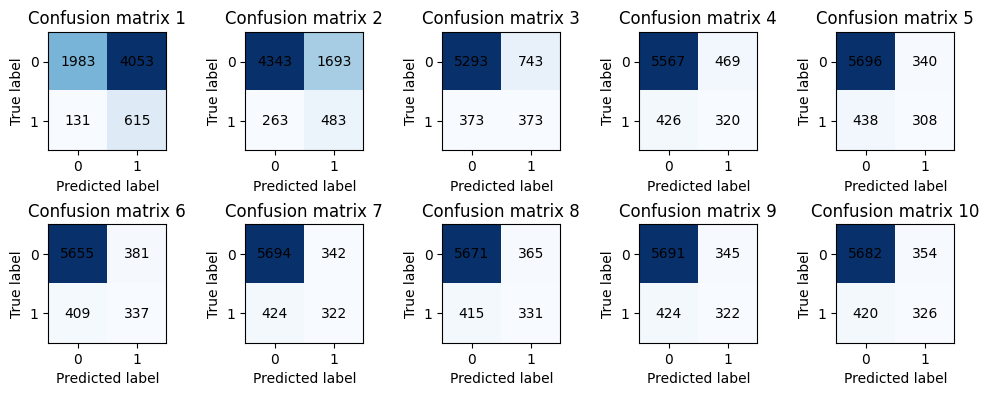

In [ ]:
# Create a figure with 10 subplots
fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(10, 4))

# Plot each confusion matrix on a separate subplot
for conf, ax in enumerate(axs.flat):
    if conf < len(conf_matrices_model1):
        conf_matrix = conf_matrices_model1[conf]
        ax.imshow(conf_matrix, cmap = 'Blues')
        # Add the count of each square to the plot
        for i in range(conf_matrix.shape[0]):
          for j in range(conf_matrix.shape[1]):
            ax.text(j, i, conf_matrix[i, j], ha='center', va='center', color='black')
        ax.set_xticks([0, 1])
        ax.set_yticks([0, 1])
        ax.set_xlabel('Predicted label')
        ax.set_ylabel('True label')
        ax.set_title(f'Confusion matrix {conf+1}')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the figure
plt.show()

##Using LMF in training time

###Creating callback for applying LMF in epochs


In [ ]:
from keras.callbacks import Callback
class LowRankApproximationCallback(Callback):
    def __init__(self, k, approach):
        super(LowRankApproximationCallback, self).__init__()
        self.k = k
        self.approach = approach
    def on_epoch_end(self, epoch, logs=None):
          if self.approach == "all":
           update_weight(self.model, self.k)
          if self.approach == "even":
            if epoch % 2 == 0: # apply low rank approximation only on even epochs
              update_weight(self.model, k)


###Using LMF in all epochs

In [ ]:
ُk = 5 # set rank of low rank approximation
lra_callback = LowRankApproximationCallback(k, 'all')
#create model with 10 neurons
mlp_all_layers_lmf_1 = Sequential()
mlp_all_layers_lmf_1.add(Dense(10, activation='relu', input_dim=X_train.shape[1]))
mlp_all_layers_lmf_1.add(Dense(1, activation='sigmoid'))
mlp_all_layers_lmf_1.compile(optimizer=Adam(lr=0.01), loss='binary_crossentropy', metrics=['accuracy'])
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)
mlp_all_layers_lmf_1.fit(x=X_train, y=y_train, epochs=20, validation_data=(X_val, y_val), callbacks=[early_stop, lra_callback])

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


989/989 [==============================] - 2s 2ms/step - loss: 0.3119 - accuracy: 0.8861 - val_loss: 0.3182 - val_accuracy: 0.8853
Epoch 2/20
989/989 [==============================] - 2s 2ms/step - loss: 0.2971 - accuracy: 0.8929 - val_loss: 0.3118 - val_accuracy: 0.8851
Epoch 3/20
989/989 [==============================] - 1s 1ms/step - loss: 0.2953 - accuracy: 0.8930 - val_loss: 0.3091 - val_accuracy: 0.8863
Epoch 4/20
989/989 [==============================] - 2s 2ms/step - loss: 0.2938 - accuracy: 0.8934 - val_loss: 0.3104 - val_accuracy: 0.8853
Epoch 5/20
989/989 [==============================] - 2s 2ms/step - loss: 0.2935 - accuracy: 0.8923 - val_loss: 0.3092 - val_accuracy: 0.8835
Epoch 6/20
989/989 [==============================] - 1s 1ms/step - loss: 0.2933 - accuracy: 0.8934 - val_loss: 0.3067 - val_accuracy: 0.8826
Epoch 7/20
989/989 [==============================] - 2s 2ms/step - loss: 0.2927 - accuracy: 0.8935 - val_loss: 0.3082 - val_accuracy: 0.8850
Epoch 8/20
989/98

#### accuracy and loss plot

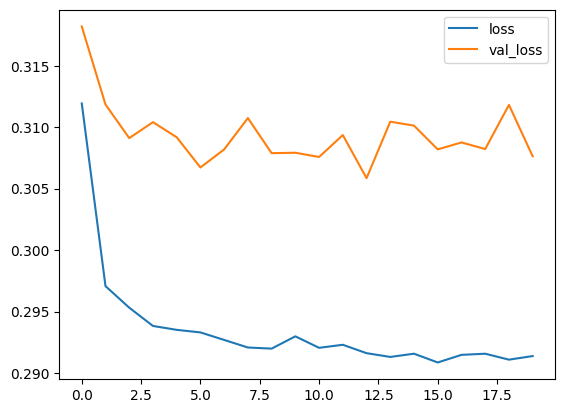

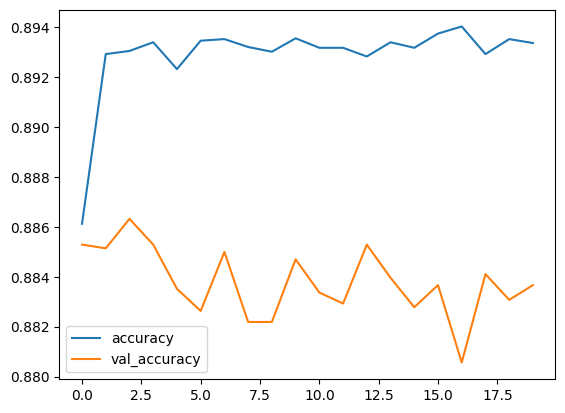

In [ ]:
model_plot(mlp_all_layers_lmf_1)

#### Draw confusion matrix for evaluation

212/212 [==============================] - 0s 841us/step
              precision    recall  f1-score   support

           0       0.93      0.94      0.94      6036
           1       0.48      0.44      0.46       746

    accuracy                           0.89      6782
   macro avg       0.71      0.69      0.70      6782
weighted avg       0.88      0.89      0.88      6782



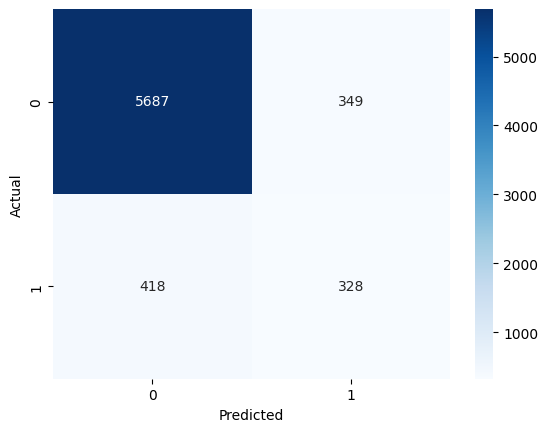

In [ ]:
# create report
create_report(y_test, mlp_all_layers_lmf_1.predict(X_test)>0.3)

###Using LMF in even epochs

In [ ]:
k = 5 # set rank of low rank approximation
lra_callback = LowRankApproximationCallback(k, 'even')
#create model with 10 neurons
mlp_even_layers_lmf_1 = Sequential()
mlp_even_layers_lmf_1.add(Dense(10, activation='relu', input_dim=X_train.shape[1]))
mlp_even_layers_lmf_1.add(Dense(1, activation='sigmoid'))
mlp_even_layers_lmf_1.compile(optimizer=Adam(lr=0.01), loss='binary_crossentropy', metrics=['accuracy'])
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)
mlp_even_layers_lmf_1.fit(x=X_train, y=y_train, epochs=20, validation_data=(X_val, y_val), callbacks=[early_stop, lra_callback])

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


989/989 [==============================] - 2s 1ms/step - loss: 0.3098 - accuracy: 0.8887 - val_loss: 0.3128 - val_accuracy: 0.8851
Epoch 2/20
989/989 [==============================] - 1s 1ms/step - loss: 0.2977 - accuracy: 0.8922 - val_loss: 0.3124 - val_accuracy: 0.8863
Epoch 3/20
989/989 [==============================] - 1s 1ms/step - loss: 0.2948 - accuracy: 0.8927 - val_loss: 0.3126 - val_accuracy: 0.8868
Epoch 4/20
989/989 [==============================] - 1s 1ms/step - loss: 0.2951 - accuracy: 0.8925 - val_loss: 0.3105 - val_accuracy: 0.8851
Epoch 5/20
989/989 [==============================] - 1s 1ms/step - loss: 0.2936 - accuracy: 0.8927 - val_loss: 0.3143 - val_accuracy: 0.8838
Epoch 6/20
989/989 [==============================] - 2s 2ms/step - loss: 0.2942 - accuracy: 0.8927 - val_loss: 0.3125 - val_accuracy: 0.8844
Epoch 7/20
989/989 [==============================] - 2s 2ms/step - loss: 0.2933 - accuracy: 0.8940 - val_loss: 0.3072 - val_accuracy: 0.8856
Epoch 8/20
989/98

#### accuracy and loss plot

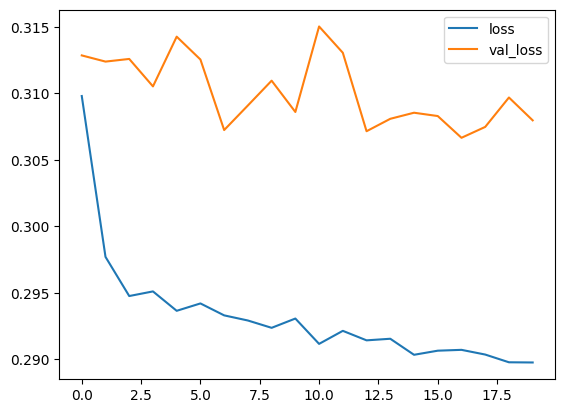

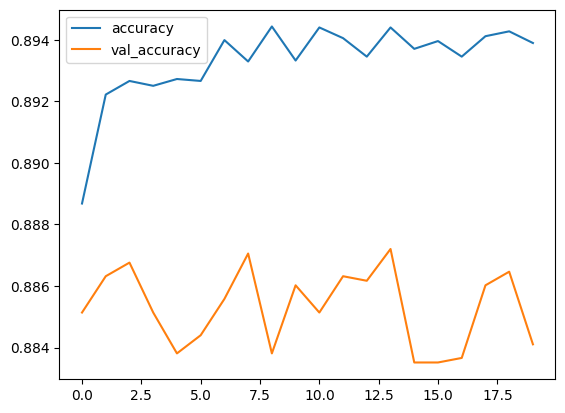

In [ ]:
model_plot(mlp_even_layers_lmf_1)

#### Draw confusion matrix for evaluation

212/212 [==============================] - 0s 885us/step
              precision    recall  f1-score   support

           0       0.93      0.94      0.94      6036
           1       0.48      0.43      0.45       746

    accuracy                           0.89      6782
   macro avg       0.70      0.69      0.69      6782
weighted avg       0.88      0.89      0.88      6782



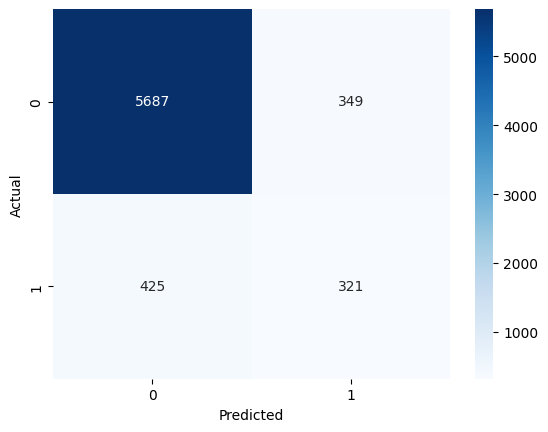

In [ ]:
# create report
create_report(y_test, mlp_even_layers_lmf_1.predict(X_test)>0.3)

#MLP model 2

## Fit the MLP with 1 hidden layers with 15 neurons

In [ ]:
#create model with 15 neurons
mlp_2 = Sequential()
mlp_2.add(Dense(15, activation='relu', input_dim=X_train.shape[1]))
mlp_2.add(Dense(1, activation='sigmoid'))
mlp_2.compile(optimizer=Adam(lr=0.01), loss='binary_crossentropy', metrics=['accuracy'])
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)
mlp_2.fit(x=X_train, y=y_train, epochs=20, validation_data=(X_val, y_val), callbacks=[early_stop])

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


989/989 [==============================] - 2s 2ms/step - loss: 0.3098 - accuracy: 0.8893 - val_loss: 0.3139 - val_accuracy: 0.8859
Epoch 2/20
989/989 [==============================] - 1s 1ms/step - loss: 0.2971 - accuracy: 0.8917 - val_loss: 0.3083 - val_accuracy: 0.8853
Epoch 3/20
989/989 [==============================] - 2s 2ms/step - loss: 0.2930 - accuracy: 0.8935 - val_loss: 0.3205 - val_accuracy: 0.8834
Epoch 4/20
989/989 [==============================] - 2s 2ms/step - loss: 0.2924 - accuracy: 0.8924 - val_loss: 0.3112 - val_accuracy: 0.8829
Epoch 5/20
989/989 [==============================] - 1s 1ms/step - loss: 0.2905 - accuracy: 0.8941 - val_loss: 0.3156 - val_accuracy: 0.8826
Epoch 6/20
989/989 [==============================] - 2s 2ms/step - loss: 0.2900 - accuracy: 0.8942 - val_loss: 0.3145 - val_accuracy: 0.8837
Epoch 7/20
989/989 [==============================] - 1s 1ms/step - loss: 0.2899 - accuracy: 0.8948 - val_loss: 0.3147 - val_accuracy: 0.8829
Epoch 8/20
989/98

###accuracy and loss

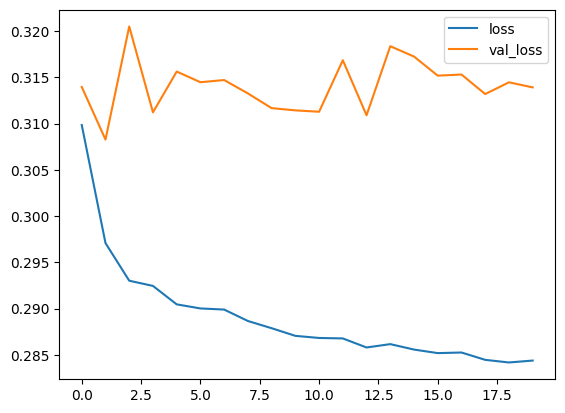

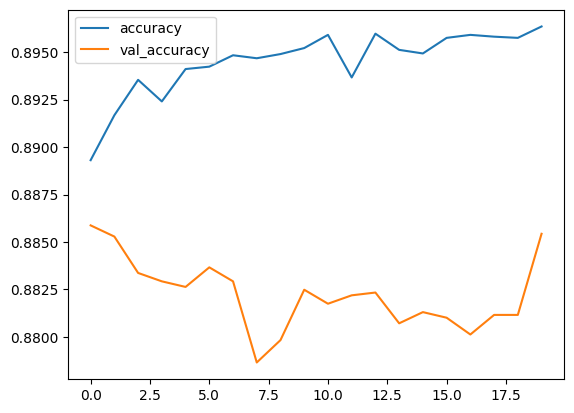

In [ ]:
model_plot(mlp_2)

### Draw the confusion matrix for evaluation

212/212 [==============================] - 0s 933us/step
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      6036
           1       0.50      0.39      0.44       746

    accuracy                           0.89      6782
   macro avg       0.71      0.67      0.69      6782
weighted avg       0.88      0.89      0.88      6782



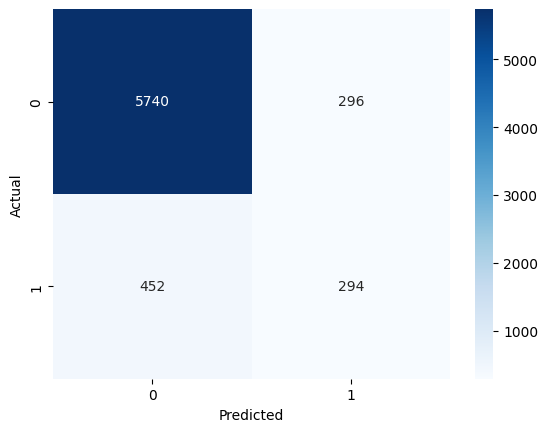

In [ ]:
# create report
create_report(y_test, mlp_2.predict(X_test)>0.3)

#MLP model 2 with LMF

## perform low rank matrix on weight matrix after train


In [ ]:
conf_matrices_model2 = []
real_weights = mlp_2.get_weights()
for k in range(1,16):
  mlp_2.set_weights(real_weights)
  update_weight(mlp_2, k)
  predictions = mlp_2.predict(X_test)>0.3
  cnf_matrix = confusion_matrix(y_test, predictions)
  conf_matrices_model2.append(cnf_matrix)

212/212 [==============================] - 0s 843us/step


##draw confusion matrix for each k

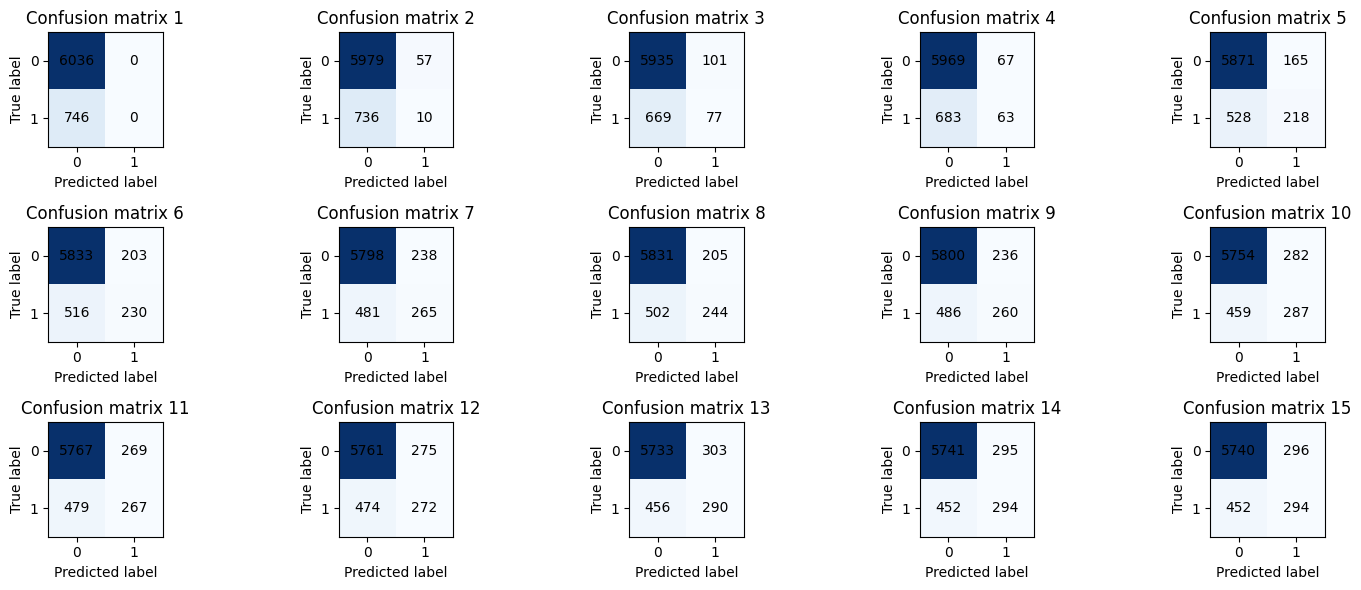

In [ ]:
# Create a figure with 15 subplots
fig, axs = plt.subplots(nrows=3, ncols=5, figsize=(15, 6))

# Plot each confusion matrix on a separate subplot
for conf, ax in enumerate(axs.flat):
    if conf < len(conf_matrices_model2):
        conf_matrix = conf_matrices_model2[conf]
        ax.imshow(conf_matrix, cmap = 'Blues')
        # Add the count of each square to the plot
        for i in range(conf_matrix.shape[0]):
          for j in range(conf_matrix.shape[1]):
            ax.text(j, i, conf_matrix[i, j], ha='center', va='center', color='black')
        ax.set_xticks([0, 1])
        ax.set_yticks([0, 1])
        ax.set_xlabel('Predicted label')
        ax.set_ylabel('True label')
        ax.set_title(f'Confusion matrix {conf+1}')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the figure
plt.show()

##Using LMF in training time

###Using LMF in all epochs

In [ ]:
k = 10 # set rank of low rank approximation
lra_callback = LowRankApproximationCallback(k, 'all')
#create model with 15 neurons
mlp_all_layers_lmf_2 = Sequential()
mlp_all_layers_lmf_2.add(Dense(15, activation='relu', input_dim=X_train.shape[1]))
mlp_all_layers_lmf_2.add(Dense(1, activation='sigmoid'))
mlp_all_layers_lmf_2.compile(optimizer=Adam(lr=0.01), loss='binary_crossentropy', metrics=['accuracy'])
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)
mlp_all_layers_lmf_2.fit(x=X_train, y=y_train, epochs=20, validation_data=(X_val, y_val), callbacks=[early_stop, lra_callback])

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


989/989 [==============================] - 2s 2ms/step - loss: 0.3088 - accuracy: 0.8906 - val_loss: 0.3157 - val_accuracy: 0.8853
Epoch 2/20
989/989 [==============================] - 2s 2ms/step - loss: 0.2972 - accuracy: 0.8922 - val_loss: 0.3134 - val_accuracy: 0.8829
Epoch 3/20
989/989 [==============================] - 1s 1ms/step - loss: 0.2960 - accuracy: 0.8929 - val_loss: 0.3100 - val_accuracy: 0.8844
Epoch 4/20
989/989 [==============================] - 2s 2ms/step - loss: 0.2932 - accuracy: 0.8933 - val_loss: 0.3109 - val_accuracy: 0.8835
Epoch 5/20
989/989 [==============================] - 2s 2ms/step - loss: 0.2927 - accuracy: 0.8941 - val_loss: 0.3129 - val_accuracy: 0.8832
Epoch 6/20
989/989 [==============================] - 1s 1ms/step - loss: 0.2914 - accuracy: 0.8941 - val_loss: 0.3082 - val_accuracy: 0.8826
Epoch 7/20
989/989 [==============================] - 1s 2ms/step - loss: 0.2915 - accuracy: 0.8939 - val_loss: 0.3083 - val_accuracy: 0.8826
Epoch 8/20
989/98

#### accuracy and loss plot

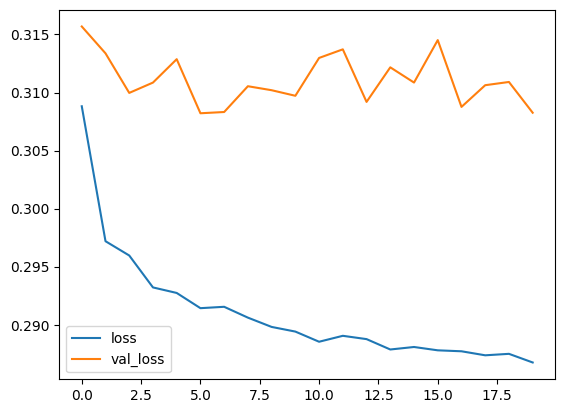

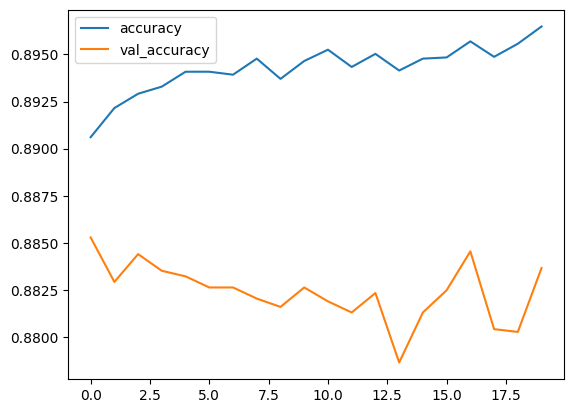

In [ ]:
model_plot(mlp_all_layers_lmf_2)

#### Draw confusion matrix for evaluation

212/212 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      6036
           1       0.50      0.40      0.44       746

    accuracy                           0.89      6782
   macro avg       0.71      0.68      0.69      6782
weighted avg       0.88      0.89      0.88      6782



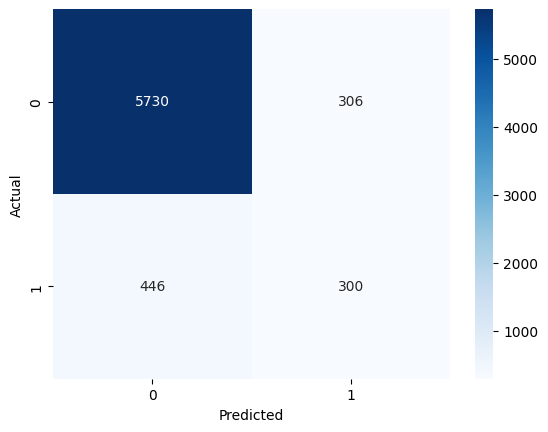

In [ ]:
# create report
create_report(y_test, mlp_all_layers_lmf_2.predict(X_test)>0.3)

###Using LMF in even epochs

In [ ]:
k = 10 # set rank of low rank approximation
lra_callback = LowRankApproximationCallback(k, 'even')
#create model with 15 neurons
mlp_even_layers_lmf_2 = Sequential()
mlp_even_layers_lmf_2.add(Dense(15, activation='relu', input_dim=X_train.shape[1]))
mlp_even_layers_lmf_2.add(Dense(1, activation='sigmoid'))
mlp_even_layers_lmf_2.compile(optimizer=Adam(lr=0.01), loss='binary_crossentropy', metrics=['accuracy'])
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)
mlp_even_layers_lmf_2.fit(x=X_train, y=y_train, epochs=20, validation_data=(X_val, y_val), callbacks=[early_stop, lra_callback])

#### accuracy and loss plot

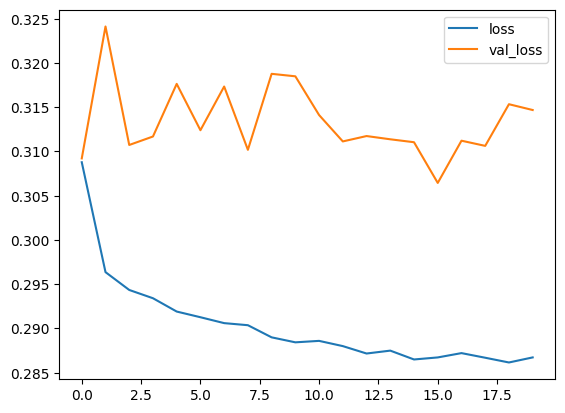

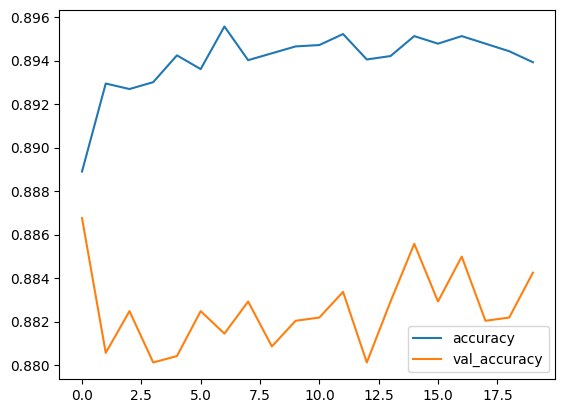

In [ ]:
model_plot(mlp_even_layers_lmf_2)

#### Draw confusion matrix for evaluation

212/212 [==============================] - 0s 873us/step
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      6036
           1       0.44      0.46      0.45       746

    accuracy                           0.88      6782
   macro avg       0.68      0.69      0.69      6782
weighted avg       0.88      0.88      0.88      6782



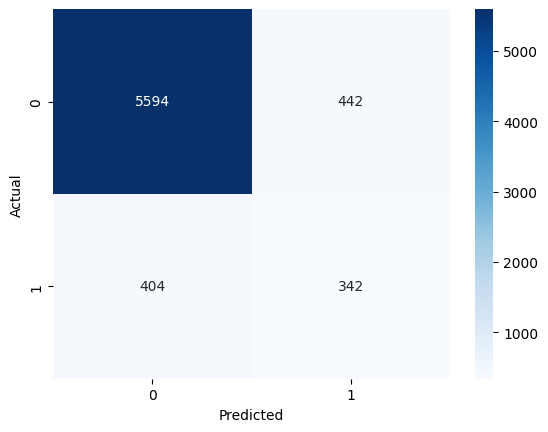

In [ ]:
# create report
create_report(y_test, mlp_even_layers_lmf_2.predict(X_test)>0.3)

#MLP model 3

## Fit the MLP with 1 hidden layers with 20 neurons

In [ ]:
#create model with 20 neurons
mlp_3 = Sequential()
mlp_3.add(Dense(20, activation='relu', input_dim=X_train.shape[1]))
mlp_3.add(Dense(1, activation='sigmoid'))
mlp_3.compile(optimizer=Adam(lr=0.01), loss='binary_crossentropy', metrics=['accuracy'])
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)
mlp_3.fit(x=X_train, y=y_train, epochs=20, validation_data=(X_val, y_val), callbacks=[early_stop])

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


989/989 [==============================] - 2s 2ms/step - loss: 0.3080 - accuracy: 0.8901 - val_loss: 0.3156 - val_accuracy: 0.8841
Epoch 2/20
989/989 [==============================] - 1s 1ms/step - loss: 0.2971 - accuracy: 0.8929 - val_loss: 0.3089 - val_accuracy: 0.8837
Epoch 3/20
989/989 [==============================] - 1s 1ms/step - loss: 0.2943 - accuracy: 0.8936 - val_loss: 0.3089 - val_accuracy: 0.8806
Epoch 4/20
989/989 [==============================] - 2s 2ms/step - loss: 0.2930 - accuracy: 0.8940 - val_loss: 0.3125 - val_accuracy: 0.8817
Epoch 5/20
989/989 [==============================] - 2s 2ms/step - loss: 0.2915 - accuracy: 0.8946 - val_loss: 0.3117 - val_accuracy: 0.8823
Epoch 6/20
989/989 [==============================] - 2s 2ms/step - loss: 0.2904 - accuracy: 0.8950 - val_loss: 0.3106 - val_accuracy: 0.8813
Epoch 7/20
989/989 [==============================] - 2s 2ms/step - loss: 0.2896 - accuracy: 0.8949 - val_loss: 0.3113 - val_accuracy: 0.8806
Epoch 8/20
989/98

### accuracy and loss

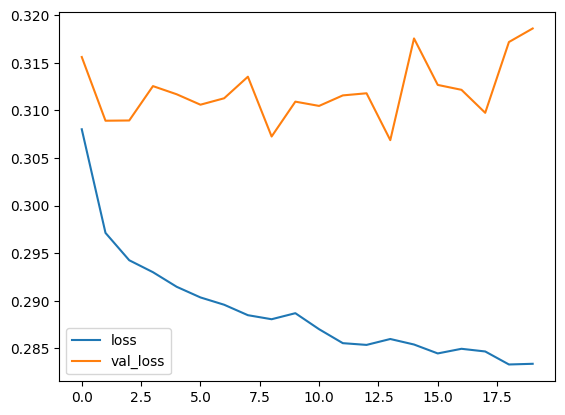

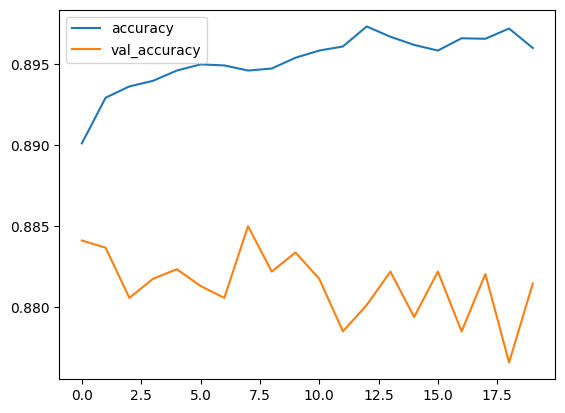

In [ ]:
model_plot(mlp_3)

### Draw the confusion matrix for evaluation

212/212 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      6036
           1       0.49      0.39      0.43       746

    accuracy                           0.89      6782
   macro avg       0.71      0.67      0.69      6782
weighted avg       0.88      0.89      0.88      6782



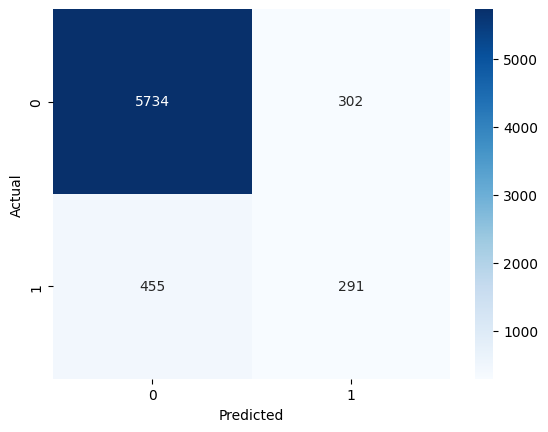

In [ ]:
# create report
create_report(y_test, mlp_3.predict(X_test)>0.3)

#MLP model 3 with LMF

## perform low rank matrix on weight matrix after train


In [ ]:
conf_matrices_model3 = []
real_weights = mlp_3.get_weights()
for k in range(1,21):
  mlp_3.set_weights(real_weights)
  update_weight(mlp_3, k)
  predictions = mlp_3.predict(X_test)>0.3
  cnf_matrix = confusion_matrix(y_test, predictions)
  conf_matrices_model3.append(cnf_matrix)

212/212 [==============================] - 0s 846us/step


##draw confusion matrix for each k

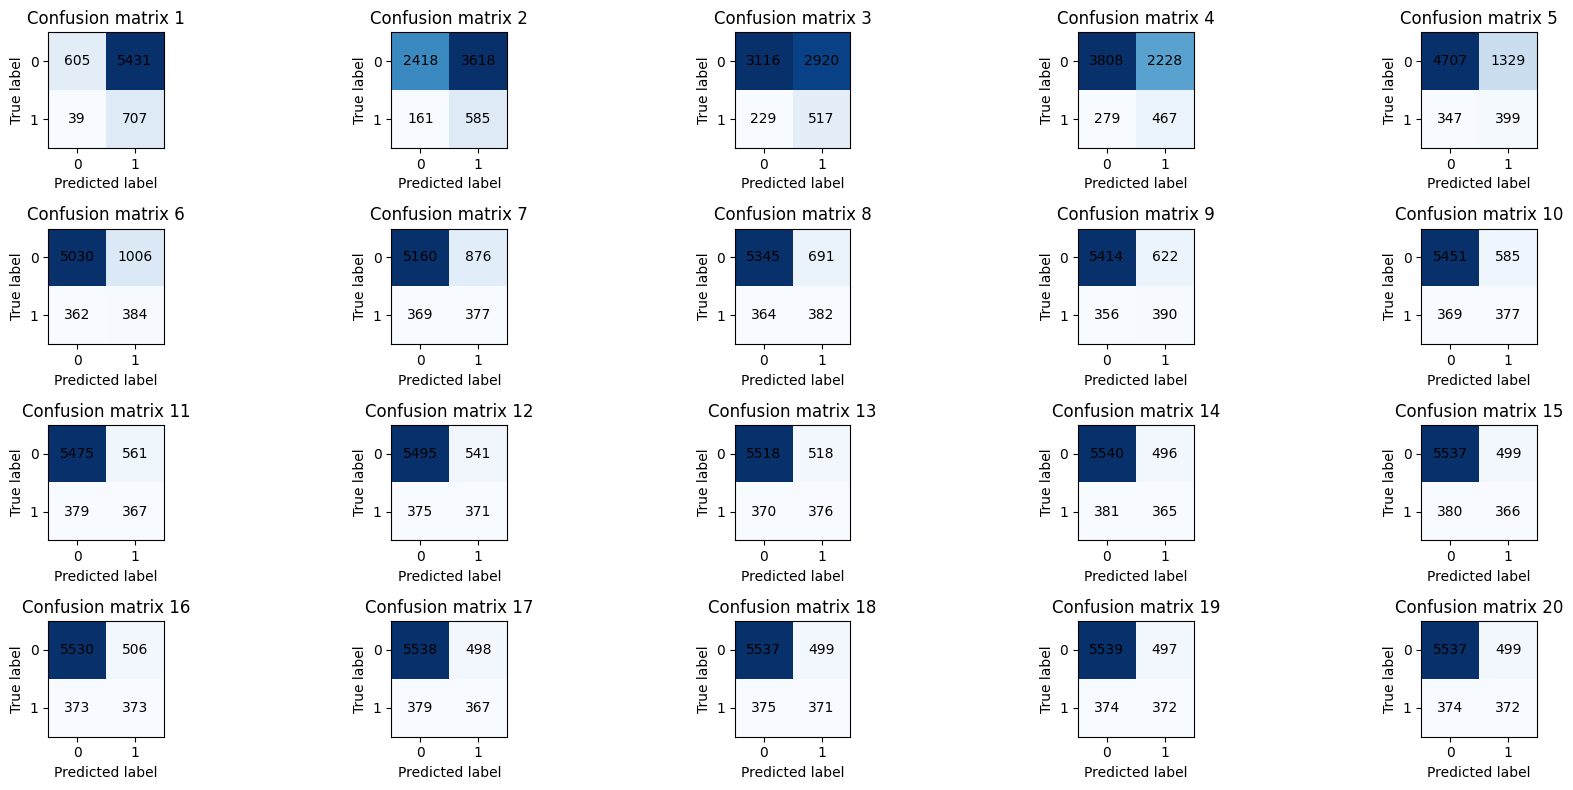

In [ ]:
# Create a figure with 20 subplots
fig, axs = plt.subplots(nrows=4, ncols=5, figsize=(18, 8))

# Plot each confusion matrix on a separate subplot
for conf, ax in enumerate(axs.flat):
    if conf < len(conf_matrices_model3):
        conf_matrix = conf_matrices_model3[conf]
        ax.imshow(conf_matrix, cmap = 'Blues')
        # Add the count of each square to the plot
        for i in range(conf_matrix.shape[0]):
          for j in range(conf_matrix.shape[1]):
            ax.text(j, i, conf_matrix[i, j], ha='center', va='center', color='black')
        ax.set_xticks([0, 1])
        ax.set_yticks([0, 1])
        ax.set_xlabel('Predicted label')
        ax.set_ylabel('True label')
        ax.set_title(f'Confusion matrix {conf+1}')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the figure
plt.show()

##Using LMF in training time

###Using LMF in all epochs

In [ ]:
k = 10 # set rank of low rank approximation
lra_callback = LowRankApproximationCallback(k, 'all')
#create model with 20 neurons
mlp_all_layers_lmf_3 = Sequential()
mlp_all_layers_lmf_3.add(Dense(20, activation='relu', input_dim=X_train.shape[1]))
mlp_all_layers_lmf_3.add(Dense(1, activation='sigmoid'))
mlp_all_layers_lmf_3.compile(optimizer=Adam(lr=0.01), loss='binary_crossentropy', metrics=['accuracy'])
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)
mlp_all_layers_lmf_3.fit(x=X_train, y=y_train, epochs=20, validation_data=(X_val, y_val), callbacks=[early_stop, lra_callback])

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


989/989 [==============================] - 4s 3ms/step - loss: 0.3060 - accuracy: 0.8904 - val_loss: 0.3101 - val_accuracy: 0.8820
Epoch 2/20
989/989 [==============================] - 1s 1ms/step - loss: 0.2967 - accuracy: 0.8923 - val_loss: 0.3113 - val_accuracy: 0.8859
Epoch 3/20
989/989 [==============================] - 2s 2ms/step - loss: 0.2949 - accuracy: 0.8927 - val_loss: 0.3075 - val_accuracy: 0.8837
Epoch 4/20
989/989 [==============================] - 1s 1ms/step - loss: 0.2936 - accuracy: 0.8939 - val_loss: 0.3083 - val_accuracy: 0.8845
Epoch 5/20
989/989 [==============================] - 1s 1ms/step - loss: 0.2929 - accuracy: 0.8942 - val_loss: 0.3075 - val_accuracy: 0.8845
Epoch 6/20
989/989 [==============================] - 2s 2ms/step - loss: 0.2917 - accuracy: 0.8936 - val_loss: 0.3158 - val_accuracy: 0.8828
Epoch 7/20
989/989 [==============================] - 1s 1ms/step - loss: 0.2907 - accuracy: 0.8942 - val_loss: 0.3098 - val_accuracy: 0.8838
Epoch 8/20
989/98

#### accuracy and loss plot

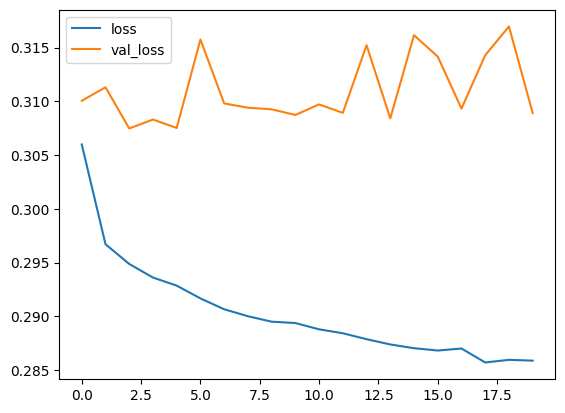

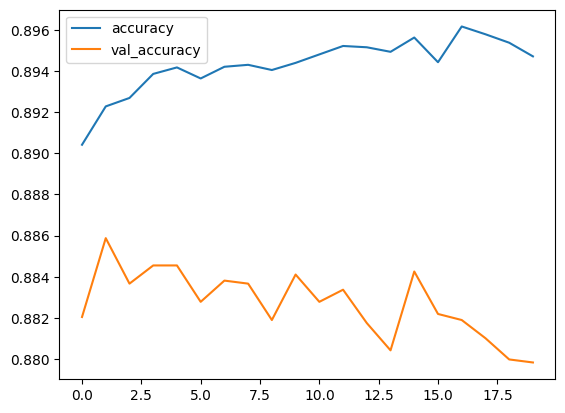

In [ ]:
model_plot(mlp_all_layers_lmf_3)

#### Draw the confusion matrix for evaluation

212/212 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      6036
           1       0.46      0.46      0.46       746

    accuracy                           0.88      6782
   macro avg       0.70      0.70      0.70      6782
weighted avg       0.88      0.88      0.88      6782



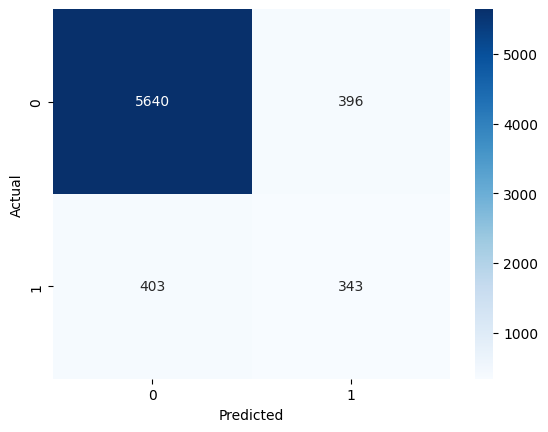

In [ ]:
# create report
create_report(y_test, mlp_all_layers_lmf_3.predict(X_test)>0.3)

###Using LMF in even epochs

In [ ]:
k = 10 # set rank of low rank approximation
lra_callback = LowRankApproximationCallback(k, 'even')
#create model with 20 neurons
mlp_even_layers_lmf_3 = Sequential()
mlp_even_layers_lmf_3.add(Dense(20, activation='relu', input_dim=X_train.shape[1]))
mlp_even_layers_lmf_3.add(Dense(1, activation='sigmoid'))
mlp_even_layers_lmf_3.compile(optimizer=Adam(lr=0.01), loss='binary_crossentropy', metrics=['accuracy'])
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)
mlp_even_layers_lmf_3.fit(x=X_train, y=y_train, epochs=20, validation_data=(X_val, y_val), callbacks=[early_stop, lra_callback])

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


989/989 [==============================] - 2s 2ms/step - loss: 0.3078 - accuracy: 0.8902 - val_loss: 0.3124 - val_accuracy: 0.8854
Epoch 2/20
989/989 [==============================] - 2s 2ms/step - loss: 0.2977 - accuracy: 0.8922 - val_loss: 0.3089 - val_accuracy: 0.8866
Epoch 3/20
989/989 [==============================] - 2s 2ms/step - loss: 0.2939 - accuracy: 0.8931 - val_loss: 0.3125 - val_accuracy: 0.8810
Epoch 4/20
989/989 [==============================] - 2s 2ms/step - loss: 0.2935 - accuracy: 0.8924 - val_loss: 0.3075 - val_accuracy: 0.8850
Epoch 5/20
989/989 [==============================] - 2s 2ms/step - loss: 0.2927 - accuracy: 0.8930 - val_loss: 0.3133 - val_accuracy: 0.8860
Epoch 6/20
989/989 [==============================] - 1s 1ms/step - loss: 0.2925 - accuracy: 0.8942 - val_loss: 0.3164 - val_accuracy: 0.8832
Epoch 7/20
989/989 [==============================] - 2s 2ms/step - loss: 0.2918 - accuracy: 0.8947 - val_loss: 0.3097 - val_accuracy: 0.8856
Epoch 8/20
989/98

#### accuracy and loss plot

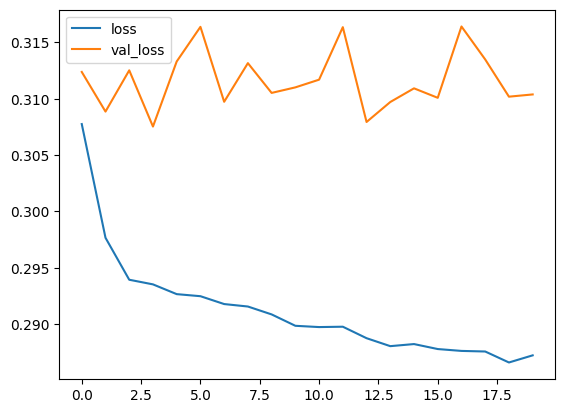

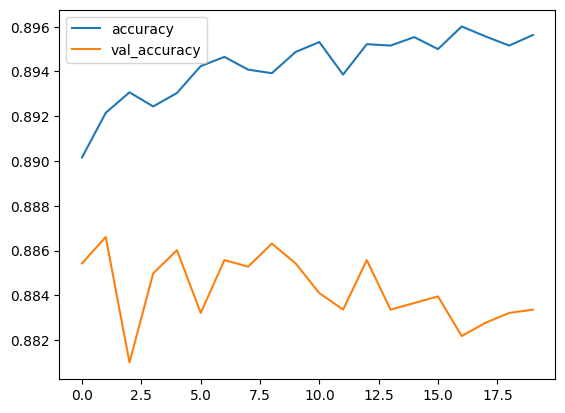

In [ ]:
model_plot(mlp_even_layers_lmf_3)

#### Draw the confusion matrix for evaluation

212/212 [==============================] - 0s 926us/step
              precision    recall  f1-score   support

           0       0.93      0.94      0.93      6036
           1       0.46      0.45      0.45       746

    accuracy                           0.88      6782
   macro avg       0.70      0.69      0.69      6782
weighted avg       0.88      0.88      0.88      6782



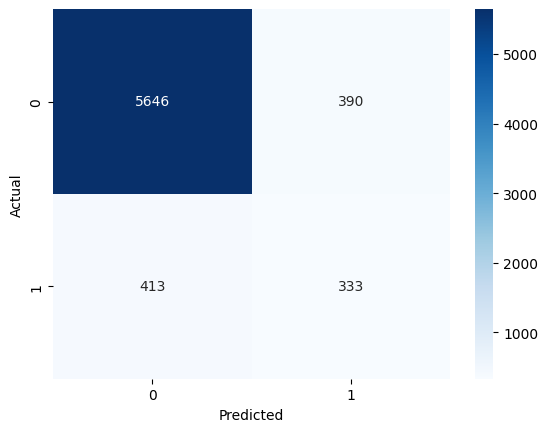

In [ ]:
# create report
create_report(y_test, mlp_even_layers_lmf_3.predict(X_test)>0.3)